In [2]:
#this dataset is of EnergyStatewideStorage which we are storing into postgres

from sqlalchemy import create_engine
import pandas as pd

# Define PostgreSQL connection parameters
POSTGRES_USERNAME = 'postgres'
POSTGRES_PASSWORD = 'venkata28'
POSTGRES_HOST = 'localhost'
POSTGRES_PORT = '5432'
POSTGRES_DBNAME = 'postgres'

# Create a connection string
connection_string = f'postgresql://{POSTGRES_USERNAME}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DBNAME}'

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Load CSV file into a pandas DataFrame
# Load CSV file into a pandas DataFrame
csv_file_path = "C:\\Users\\ADMIN\\Downloads\\All_Statewide_Energy.csv"
df = pd.read_csv(csv_file_path)

# Define table name
table_name = 'storage'

# Write DataFrame to PostgreSQL
df.to_sql(table_name, engine, if_exists='replace', index=False)

print("Data written to PostgreSQL successfully.")

Data written to PostgreSQL successfully.


In [14]:
from sqlalchemy import create_engine
import pandas as pd

# Define PostgreSQL connection parameters
POSTGRES_USERNAME = 'postgres'
POSTGRES_PASSWORD = 'venkata28'
POSTGRES_HOST = 'localhost'
POSTGRES_PORT = '5432'
POSTGRES_DBNAME = 'postgres'

# Create a connection string
connection_string = f'postgresql://{POSTGRES_USERNAME}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DBNAME}'

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Specify the table name from which to read data
table_name = 'storage'

# Read data from PostgreSQL into a DataFrame
df = pd.read_sql_table(table_name, engine)

# Display the DataFrame
print(df.head())  # Print first few rows of the DataFrame

  Data Through Date      Project ID Interconnection Date         Utility  \
0        12/31/2023  PAM-2016-40374           01/31/2019          PSEGLI   
1        12/31/2023        CH-00768           05/12/2015  Central Hudson   
2        12/31/2023          402932           02/03/2023   National Grid   
3        12/31/2023          321541           01/07/2021   National Grid   
4        12/31/2023  PAM-2020-84417           10/14/2021          PSEGLI   

      City/Town    County  ZIP Code         Division    Substation  \
0       Montauk   Suffolk   11954.0             None          None   
1      Newburgh    Orange   12550.0         Newburgh  Bethlehem Rd   
2    GANSEVOORT  Saratoga   12831.0  038-Glens Falls    BUTLER 362   
3         HOMER  Cortland   13077.0   012 - Cortland         NYSEG   
4  Lake Success    Nassau   11020.0             None          None   

    Circuit ID Storage Type                     Developer Metering Method  \
0       9NR4L4      Battery                  

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
csv_file_path = r"C:\Users\ADMIN\Downloads\All_Statewide_Energy.csv"
df = pd.read_csv(csv_file_path)

# Check the structure of the DataFrame
print("DataFrame structure:")
print(df.info())

# 1. Pre-processing
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values by filling numeric columns with their mean
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Check if 'Date' column exists
if 'Date' in df.columns:
    # Filter out or correct entries in the 'Date' column that are not in the expected date format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Drop rows with missing or invalid 'Date' values
    df = df.dropna(subset=['Date'])
else:
    print("No 'Date' column found in the DataFrame.")

# Check if 'Energy_Consumption' column exists
if 'Energy_Consumption' in df.columns:
    # Proceed with visualization and analysis
    # 3. Analysis
    # Compute descriptive statistics
    summary_statistics = df.describe()
    print("Summary Statistics:\n", summary_statistics)

    # Identify correlations between variables
    correlation_matrix = df.corr()
    print("Correlation Matrix:\n", correlation_matrix)

    # 4. Visualization
    # Histogram of a numerical variable
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Energy_Consumption'], bins=20, kde=True)
    plt.title('Histogram of Energy Consumption')
    plt.xlabel('Energy Consumption')
    plt.ylabel('Frequency')
    plt.show()

    # Scatter plot of two numerical variables
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Temperature', y='Energy_Consumption')
    plt.title('Scatter Plot of Temperature vs Energy Consumption')
    plt.xlabel('Temperature')
    plt.ylabel('Energy Consumption')
    plt.show()

    # Heatmap of correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()
else:
    print("No 'Energy_Consumption' column found in the DataFrame.")


DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4974 entries, 0 to 4973
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Data Through Date                  4974 non-null   object 
 1   Project ID                         4970 non-null   object 
 2   Interconnection Date               4974 non-null   object 
 3   Utility                            4974 non-null   object 
 4   City/Town                          4970 non-null   object 
 5   County                             4974 non-null   object 
 6   ZIP Code                           4973 non-null   float64
 7   Division                           2717 non-null   object 
 8   Substation                         2717 non-null   object 
 9   Circuit ID                         4966 non-null   object 
 10  Storage Type                       4974 non-null   object 
 11  Developer                          

Summary Statistics:
 count     4974.000000
mean        68.496024
std        691.875444
min          0.350000
25%          5.000000
50%          8.650000
75%         10.000000
max      20000.000000
Name: Energy Storage System Size (kWac), dtype: float64


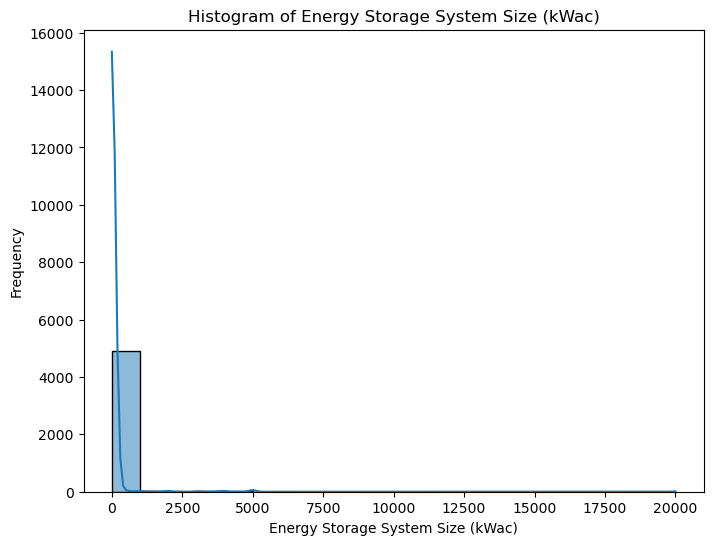

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
csv_file_path = "C:\\Users\\ADMIN\\Downloads\\All_Statewide_Energy.csv"
df = pd.read_csv(csv_file_path)

# 1. Summary Statistics
summary_statistics = df['Energy Storage System Size (kWac)'].describe()
print("Summary Statistics:\n", summary_statistics)

# 2. Visualization
plt.figure(figsize=(8, 6))
sns.histplot(df['Energy Storage System Size (kWac)'], bins=20, kde=True)
plt.title('Histogram of Energy Storage System Size (kWac)')
plt.xlabel('Energy Storage System Size (kWac)')
plt.ylabel('Frequency')
plt.show()

# 3. Further Analysis (Optional)
# You can perform additional analysis based on your specific questions or objectives.


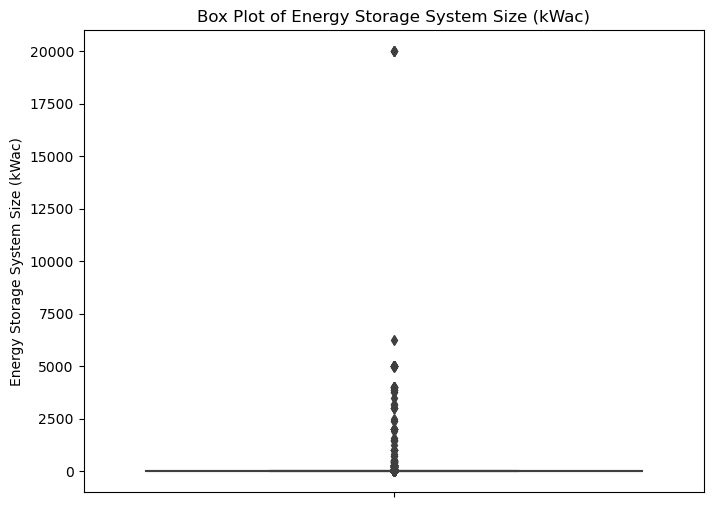

In [26]:
 # 1. Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Energy Storage System Size (kWac)')
plt.title('Box Plot of Energy Storage System Size (kWac)')
plt.ylabel('Energy Storage System Size (kWac)')
plt.show()

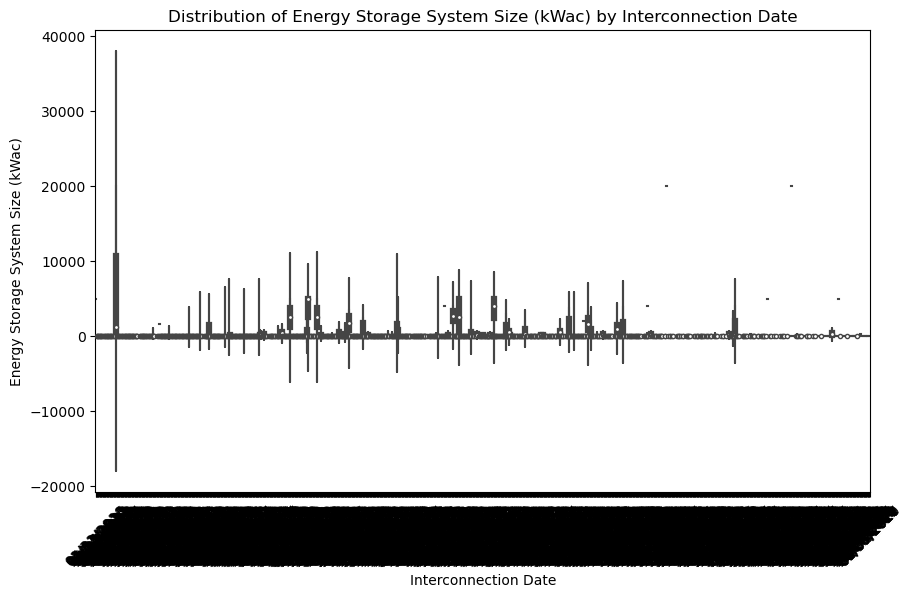

In [23]:
# 2. Distribution by Interconnection Date
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Interconnection Date', y='Energy Storage System Size (kWac)')
plt.title('Distribution of Energy Storage System Size (kWac) by Interconnection Date')
plt.xlabel('Interconnection Date')
plt.ylabel('Energy Storage System Size (kWac)')
plt.xticks(rotation=45)
plt.show()


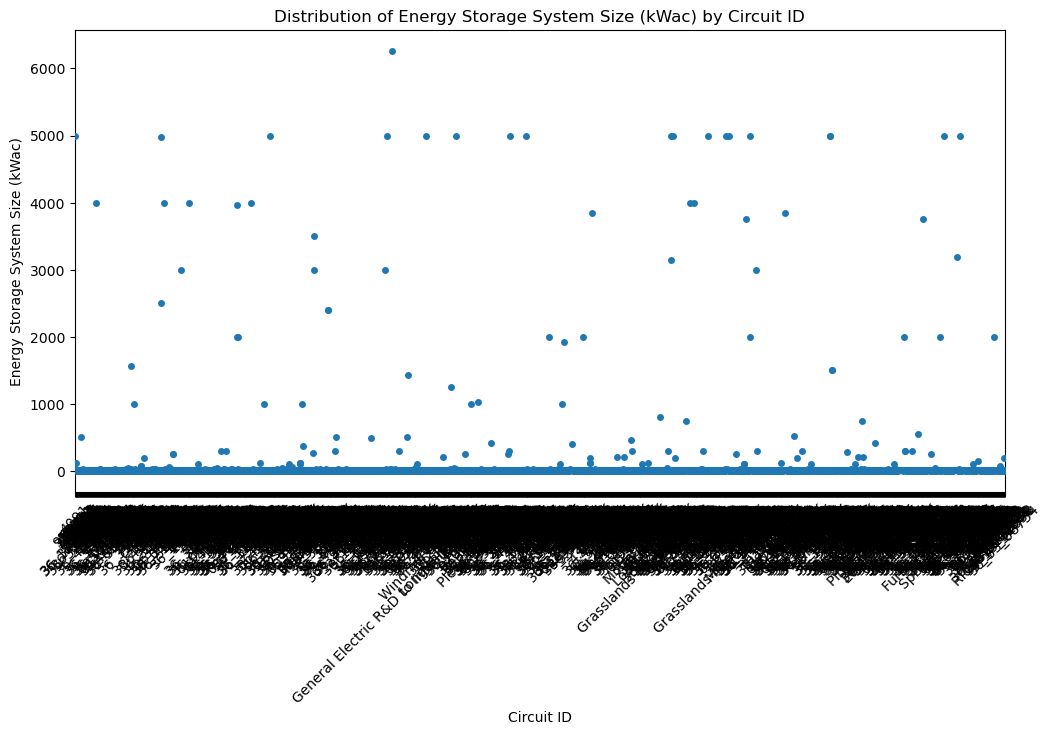

In [25]:
 # 3. Distribution by Circuit ID
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='Circuit ID', y='Energy Storage System Size (kWac)', jitter=True)
plt.title('Distribution of Energy Storage System Size (kWac) by Circuit ID')
plt.xlabel('Circuit ID')
plt.ylabel('Energy Storage System Size (kWac)')
plt.xticks(rotation=45)
plt.show()


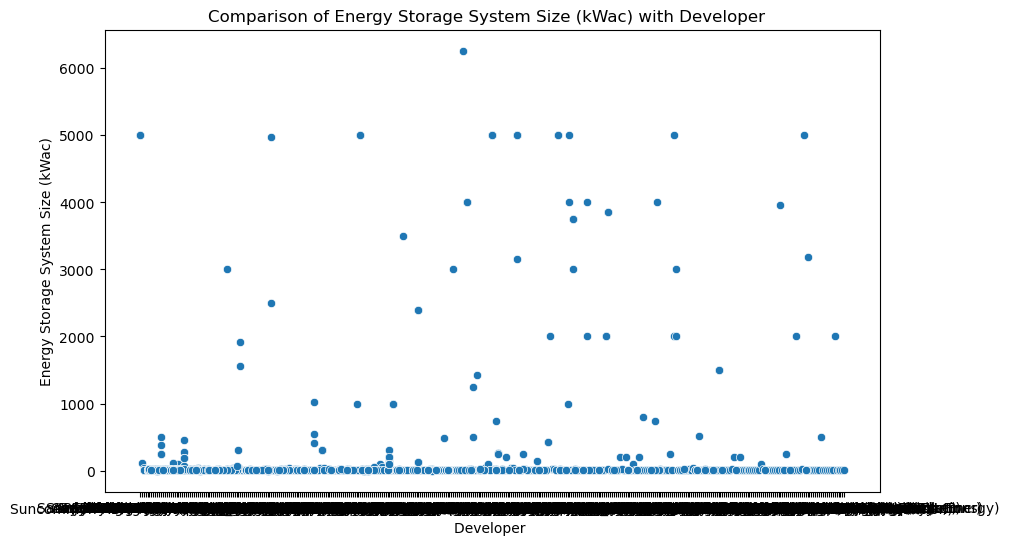

In [36]:
 # 4. Comparison with Other Variables (e.g., Energy Consumption)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Developer' , y='Energy Storage System Size (kWac)')
plt.title('Comparison of Energy Storage System Size (kWac) with Developer  ')
plt.xlabel('Developer ')
plt.ylabel('Energy Storage System Size (kWac)')
plt.show()


